# 피마 인디언의 당뇨병 예측

## 피마 인디언 데이터 분석 및 전처리



### 데이터 불러오기

In [ ]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/pima-indians-diabetes.csv' 
                 , names=["pregnant", "plasma","pressure", "thickness","insulin","BMI","pedigree","age","class"])



### 데이터 간단히 둘러보기

In [ ]:
print(df.head(5))
# 데이터의 앞부분 간단히

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [ ]:
# 데이터의 전반적인 형태
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 평균,최대최소,등
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
# 일부 열만 출력
# 임신여부에 대한 당뇨병 여부
print(df[['pregnant','class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


### 11.4 데이터 가공하기

#### 임심기준으로 묶어서 횟수당 당뇨병 발병의 평균 구하기

In [ ]:
print(df[['pregnant','class']].groupby(['pregnant'],as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


### 데이터 시각화 하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 그래프의 크기 설정

In [ ]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

#### 히트맵으로 시각화

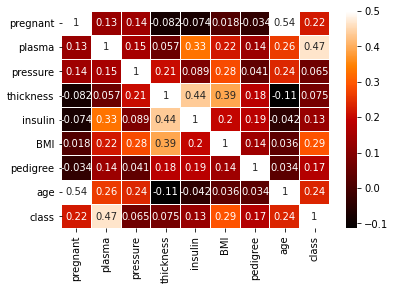

In [ ]:
# heatmap(데이터, 한칸 너비, 밝기, 색상, 선 색상,)
# annot 이 무엇일까
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)

히트맵 결론: plasma 랑 상관도가 높다!!

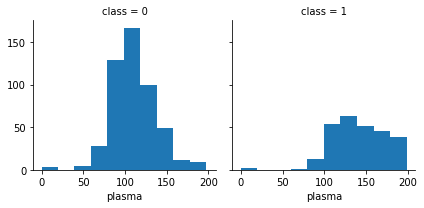

In [ ]:
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

그리드 결론: plasma가 150 이상인 사람이 당뇨병 결릴 확률이 높다

# 모델 설계및 예측

====================================================================
## 당뇨병 예측 실행

In [ ]:
# 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 라이브러리 호출
import numpy as np
import tensorflow as tf

In [ ]:
# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 로드
dataset = np.loadtxt("../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/pima-indians-diabetes.csv",delimiter=",")

x= dataset[:,0:8]
y = dataset[:,8]

# 모델 설정
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
# 모델 학습
model.fit(x,y,epochs=50,batch_size=10)

Epoch 1/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7396
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7422
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7383
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7396
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7396
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7474
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7266
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7318
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7448
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7409
Epoch 11/50
77/77 [

모델 결론: 정확도: 0.7617 